a. Data wrangling  of proteomics data - fetch peptide counts and Gene ID_id -->

In [1]:
# Import packages needed for the notebook
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles

In [2]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel('../Data/03_Proteomics_data/20221124_FJ_E1200_MWN_15cm_140min_500ng_#1572_proteins.xlsx')
df

,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,# PSMs,...,"Found in Sample: [S23] F23: Sample, 8","Found in Sample: [S24] F24: Sample, 9","Found in Sample: [S25] F25: Sample, 10","Found in Sample: [S26] F26: Sample, 11","Found in Sample: [S27] F27: Sample, 12","Found in Sample: [S28] F28: Sample, 13","Found in Sample: [S29] F29: Sample, 14","Found in Sample: [S30] F30: Sample, 15",# Protein Groups,Modifications
0,False,High,Master Protein,AO090003000935-T-p1,transcript=AO090003000935-T | gene=AO090003000...,0.000,599.687,89,31,7127,...,High,High,High,High,High,High,High,High,1,NaN
1,False,High,Master Protein,AO090023000944-T-p1,transcript=AO090023000944-T | gene=AO090023000...,0.000,523.784,68,32,3237,...,High,High,High,Peak Found,Peak Found,High,High,High,1,NaN
2,False,High,Master Protein,AO090003001591-T-p1,transcript=AO090003001591-T | gene=AO090003001...,0.000,519.742,68,33,2987,...,High,High,Not Found,Not Found,Not Found,High,High,High,1,NaN
3,False,High,Master Protein,RFP_Fusion,RFP_Fusion,0.000,450.464,64,35,398,...,High,Peak Found,High,Peak Found,High,High,High,High,1,NaN
4,False,High,Master Protein,AO090005001300-T-p1,transcript=AO090005001300-T | gene=AO090005001...,0.000,384.472,90,45,554,...,High,High,High,High,High,High,High,High,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,False,Medium,Master Protein,AO090001000075-T-p1,transcript=AO090001000075-T | gene=AO090001000...,0.044,1.795,4,1,1,...,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,1,NaN
862,False,Medium,Master Protein,AO090005001355-T-p1,transcript=AO090005001355-T | gene=AO090005001...,0.046,1.790,14,1,1,...,Peak Found,Peak Found,Peak Found,Not Found,Peak Found,Not Found,Peak Found,Not Found,1,NaN
863,False,Medium,Master Protein,AO090003000247-T-p1,transcript=AO090003000247-T | gene=AO090003000...,0.047,1.779,4,1,1,...,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Not Found,Not Found,Not Found,1,Met-loss [N-Term]
864,False,Medium,Master Protein,AO090001000680-T-p1,transcript=AO090001000680-T | gene=AO090001000...,0.048,1.774,1,1,1,...,Not Found,Not Found,Peak Found,Peak Found,Not Found,Peak Found,High,Peak Found,1,NaN


In [3]:
# Isolate scaled abundance values from the Excel file 
abundance = df.iloc[:, 25:40]
abundance

,"Abundances (Scaled): F16: Sample, 1","Abundances (Scaled): F17: Sample, 2","Abundances (Scaled): F18: Sample, 3","Abundances (Scaled): F19: Sample, 4","Abundances (Scaled): F20: Sample, 5","Abundances (Scaled): F21: Sample, 6","Abundances (Scaled): F22: Sample, 7","Abundances (Scaled): F23: Sample, 8","Abundances (Scaled): F24: Sample, 9","Abundances (Scaled): F25: Sample, 10","Abundances (Scaled): F26: Sample, 11","Abundances (Scaled): F27: Sample, 12","Abundances (Scaled): F28: Sample, 13","Abundances (Scaled): F29: Sample, 14","Abundances (Scaled): F30: Sample, 15"
0,5.4,4.3,7.4,238.6,245.2,282.2,20.2,11.5,11.1,142.5,176.7,160.5,81.0,35.7,77.8
1,242.7,250.1,258.5,6.1,0.9,1.0,155.0,208.9,210.3,4.7,0.3,0.2,42.9,72.6,45.7
2,231.8,214.1,244.3,3.4,2.3,1.7,175.8,199.0,215.1,3.1,1.1,0.9,62.8,84.6,60.1
3,0.5,0.5,0.4,0.4,1.4,1.3,0.4,0.5,0.4,1.4,1.9,0.7,479.1,512.4,498.7
4,96.3,38.4,17.0,255.3,92.4,95.8,39.1,12.9,15.8,243.4,157.8,152.6,89.7,111.3,82.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,201.7,18.7,NaN,NaN,NaN,NaN,139.0,NaN,38.7,134.7,16.7,18.6,239.4,431.0,261.4
862,64.6,146.2,NaN,547.8,NaN,314.5,NaN,51.6,32.2,78.7,NaN,80.3,NaN,184.2,NaN
863,NaN,NaN,NaN,NaN,NaN,NaN,223.8,NaN,86.4,518.4,334.1,337.3,NaN,NaN,NaN
864,NaN,NaN,NaN,NaN,NaN,NaN,75.7,NaN,NaN,138.2,118.0,NaN,250.9,673.0,244.1


# Observed vs Predicted signal peptides

a. Calculate scaled abundance means per Gene ID

In [4]:
# Filter abundances data from the dataframe
scaled_ab = df.filter(like='Abundances (Scaled)')
normalized_ab = df.filter(like='Abundances (Normalized)')

# Calculate mean abundances per Gene ID by using the abundances variable
df['Mean abundances (Scaled)'] = scaled_ab.mean(axis=1)
df['Mean abundances (Normalized)'] = normalized_ab.mean(axis=1)

# Print mean abundances per Gene ID
sn_ab = df.loc[:, ['Accession', 'Mean abundances (Scaled)', 'Mean abundances (Normalized)']]
sn_ab

,Accession,Mean abundances (Scaled),Mean abundances (Normalized)
0,AO090003000935-T-p1,100.006667,2.835820e+09
1,AO090023000944-T-p1,99.993333,1.562914e+08
2,AO090003001591-T-p1,100.006667,6.804491e+09
3,RFP_Fusion,100.000000,2.090748e+08
4,AO090005001300-T-p1,100.006667,1.193228e+08
...,...,...,...
861,AO090001000075-T-p1,149.990000,2.157569e+05
862,AO090005001355-T-p1,166.677778,8.663017e+04
863,AO090003000247-T-p1,300.000000,4.195089e+05
864,AO090001000680-T-p1,249.983333,6.983411e+04


b.	Cross-reference with predicted signal peptides in notebook 00 and make a dataframe containing the parameters:
- Gene ID (Accession)
- Peptide count
- Signal peptide likelyhood
- Mean abundances scaled and normalized
- Peptide sequence

In [5]:
# Read the Excel file into a pandas DataFrame
df1_gene = pd.read_excel('../Data/01_SignalP_output/sigpep_predict.xlsx')

# Reset the index of the grouped_mean dataframe
df1 = df1_gene.reset_index()
# Change the name of the # peptides in the grouped_mean dataframe
df1 = df1_gene.rename(columns={'gene': 'Accession'})

# Merge the dataframes
merged_df = pd.merge(df, df1, on='Accession')

# Reset the index of the combined dataframe
merged_df = merged_df.reset_index(drop=True)

# Select the columns of the common Gene IDs
merged_df_sum = merged_df[['Accession', '# Peptides', 'signal_peptide_likelyhood', 'Mean abundances (Scaled)', 'Mean abundances (Normalized)', 'sequence']]

# Print the columns of the common Gene IDs
merged_df_sum

,Accession,# Peptides,signal_peptide_likelyhood,Mean abundances (Scaled),Mean abundances (Normalized),sequence
0,AO090003000935-T-p1,31,0.999834,100.006667,2.835820e+09,MEAFNLHNFLSSLYILLPFVILANPVH
1,AO090023000944-T-p1,32,0.999845,99.993333,1.562914e+08,MMVAWWSLFLYGLQVAAPAL
2,AO090003001591-T-p1,33,0.999866,100.006667,6.804491e+09,MMVAWWSLFLYGLQVAAPAL
3,AO090010000746-T-p1,37,0.999747,99.993333,3.827300e+08,MVSFSSCLRALALGSSVLAVQPVL
4,AO090026000003-T-p1,29,0.848574,100.000000,2.685090e+08,MAVRIARFLGLSTVAYLALANGID
...,...,...,...,...,...,...
251,AO090020000279-T-p1,1,0.999775,187.500000,3.736761e+05,MKVQHLSSPFLLFLLPAIAT
252,AO090011000174-T-p1,1,0.999818,187.500000,1.278171e+05,MQLLPVALLLGALAAPTA
253,AO090023000365-T-p1,1,0.999822,NaN,NaN,MRDFLSLLGLASIIASSS
254,AO090010000562-T-p1,1,0.999807,115.400000,1.123077e+05,MILGLIASLGQAAVAA


In [6]:
# Convert the dataframe into a csv file
#merged_df_sum.to_csv('../Data/04_Data_wrangling/sigpep_merged.csv', index=False)

In [7]:
# Find unique peptides (remaning peptides after finding common ones) in the predicted dataframe (SignalP)
unique_peptides_df1 = df1[~df1['Accession'].isin(merged_df['Accession'])]
unique_peptides_df1 = unique_peptides_df1[['Accession', 'signal_peptide_likelyhood', 'sequence']]
unique_peptides_df1

,Accession,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0.999803,MAPSHSFMLFLSVICTHLCSLVV
3,AO090005000053-T-p1,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0.999821,MHLQATLAVGLSLLGLTL
6,AO090005000065-T-p1,0.999855,MRIFSSIFAVANVLSLSTGRVIP
7,AO090005000067-T-p1,0.999850,MRSVSLFLWGLAPLLAS
...,...,...,...
1056,AO090103000483-T-p1,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0.999845,MRLLLIAPLFSAVSYGAQ


# Media specific statistical analysis

c. Make a statistical comparison of different media compositions by caluclating mean abundances for the scaled abundance data (Abundance (Scaled)) where:
- Sample: 1 (F16), 2 (F17), and 3 (F18) = Minimum media (MM)
- Sample 13 (F28), 14 (F29), and 15 (F30) = Rich meadia (RM) 

In [8]:
# Create a boolean mask that is True for columns that contain "Scaled" and "F16", "F17", or "F18"
mm_mask = df.columns.str.contains('Scaled') & df.columns.str.contains('F16|F17|F18', regex=True)
rm_mask = df.columns.str.contains('Scaled') & df.columns.str.contains('F28|F29|F30', regex=True)

# Use the mask to select the columns you're interested in
mm = df.loc[:,mm_mask]
rm = df.loc[:,rm_mask]
mm

,"Abundances (Scaled): F16: Sample, 1","Abundances (Scaled): F17: Sample, 2","Abundances (Scaled): F18: Sample, 3"
0,5.4,4.3,7.4
1,242.7,250.1,258.5
2,231.8,214.1,244.3
3,0.5,0.5,0.4
4,96.3,38.4,17.0
...,...,...,...
861,201.7,18.7,NaN
862,64.6,146.2,NaN
863,NaN,NaN,NaN
864,NaN,NaN,NaN


In [9]:
# Filter abundances data from the dataframe
#mm_cols = df.columns.str.contains("Scaled.*F16|F17|F18")
#rm_cols = df.columns.str.contains("Scaled.*F28|F29|F30")

#mm = df.loc[:, mm_cols]
#rm = df.loc[:, rm_cols]

# Calculate mean abundances per Gene ID by using the abundances variable
#df['Mean abundances (MM)'] = mm.mean(axis=1)
#df['Mean abundances (RM)'] = rm.mean(axis=1)

# Print mean abundances per Gene ID
#df.loc[:, ['Accession', 'Mean abundances (MM)', 'Mean abundances (RM)']]

### Mean of scaled abundances

In [10]:
# Calculate mean abundances per Gene ID by using the abundances variable
df['Scaled mean abundances (MM)'] = mm.mean(axis=1)
df['Scaled mean abundances (RM)'] = rm.mean(axis=1)

# Print mean abundances per Gene ID
s_ab_mean = df.loc[:, ['Accession', 'Scaled mean abundances (MM)', 'Scaled mean abundances (RM)']]
s_ab_mean

,Accession,Scaled mean abundances (MM),Scaled mean abundances (RM)
0,AO090003000935-T-p1,5.700000,64.833333
1,AO090023000944-T-p1,250.433333,53.733333
2,AO090003001591-T-p1,230.066667,69.166667
3,RFP_Fusion,0.466667,496.733333
4,AO090005001300-T-p1,50.566667,94.433333
...,...,...,...
861,AO090001000075-T-p1,110.200000,310.600000
862,AO090005001355-T-p1,105.400000,184.200000
863,AO090003000247-T-p1,NaN,NaN
864,AO090001000680-T-p1,NaN,389.333333


### Normalization of scaled abundances

In [11]:
# Apply Min-Max normalization 
mm_norm = (mm - mm.min()) / (mm.max() - mm.min())
rm_norm = (rm - rm.min()) / (rm.max() - rm.min())

#============ Alternative =============#
# Create a scalar object
#scaler = MinMaxScaler()

# Normalize the scaled abundance values
#mm_norm = scaler.fit_transform(mm)
#rm_norm = scaler.fit_transform(rm)
#======================================#

### Mean of normalized + scaled abundances

In [12]:
# Calculate mean of scaled + normalized abundances per Gene ID
df['Normalized mean abundances (MM)'] = mm_norm.mean(axis=1)
df['Normalized mean abundances (RM)'] = rm_norm.mean(axis=1)

#======================================================= Alternative ================================================================#
# Create a scalar object
#scaler = MinMaxScaler() 
#df[["Mean abundances (MM)","Mean abundances (RM)"]] = scaler.fit_transform(df[["Mean abundances (MM)","Mean abundances (RM)"]])
#df_norm = df.rename(columns = {'Mean abundances (MM)':'Normalized1','Mean abundances (RM)':'Normalized2'})
#====================================================================================================================================#

# Merge the dataframes to include sequence list of signal peptides
merged_df1 = pd.merge(df, df1, on='Accession')

# Print dataframe of normalized mean abundances per Gene ID
sn_ab_mean = merged_df1.loc[:, ['Accession', 'Normalized mean abundances (MM)', 'Normalized mean abundances (RM)', 'sequence']]
sn_ab_mean

,Accession,Normalized mean abundances (MM),Normalized mean abundances (RM),sequence
0,AO090003000935-T-p1,0.007994,0.059285,MEAFNLHNFLSSLYILLPFVILANPVH
1,AO090023000944-T-p1,0.356292,0.044270,MMVAWWSLFLYGLQVAAPAL
2,AO090003001591-T-p1,0.329555,0.058537,MMVAWWSLFLYGLQVAAPAL
3,AO090010000746-T-p1,0.149639,0.228295,MVSFSSCLRALALGSSVLAVQPVL
4,AO090026000003-T-p1,0.001087,0.414383,MAVRIARFLGLSTVAYLALANGID
...,...,...,...,...
251,AO090020000279-T-p1,NaN,0.092233,MKVQHLSSPFLLFLLPAIAT
252,AO090011000174-T-p1,NaN,0.310975,MQLLPVALLLGALAAPTA
253,AO090023000365-T-p1,NaN,NaN,MRDFLSLLGLASIIASSS
254,AO090010000562-T-p1,0.115743,0.045944,MILGLIASLGQAAVAA


In [13]:
# Print a summary dataframe of scaled and normalized mean abundances per Gene ID
sndf_sum = merged_df1.loc[:, ['Accession', 'Scaled mean abundances (MM)', 'Normalized mean abundances (MM)', 'Scaled mean abundances (RM)', 'Normalized mean abundances (RM)', 'sequence']]
sndf_sum

,Accession,Scaled mean abundances (MM),Normalized mean abundances (MM),Scaled mean abundances (RM),Normalized mean abundances (RM),sequence
0,AO090003000935-T-p1,5.700000,0.007994,64.833333,0.059285,MEAFNLHNFLSSLYILLPFVILANPVH
1,AO090023000944-T-p1,250.433333,0.356292,53.733333,0.044270,MMVAWWSLFLYGLQVAAPAL
2,AO090003001591-T-p1,230.066667,0.329555,69.166667,0.058537,MMVAWWSLFLYGLQVAAPAL
3,AO090010000746-T-p1,105.633333,0.149639,264.400000,0.228295,MVSFSSCLRALALGSSVLAVQPVL
4,AO090026000003-T-p1,0.833333,0.001087,470.100000,0.414383,MAVRIARFLGLSTVAYLALANGID
...,...,...,...,...,...,...
251,AO090020000279-T-p1,NaN,NaN,105.500000,0.092233,MKVQHLSSPFLLFLLPAIAT
252,AO090011000174-T-p1,NaN,NaN,364.966667,0.310975,MQLLPVALLLGALAAPTA
253,AO090023000365-T-p1,NaN,NaN,NaN,NaN,MRDFLSLLGLASIIASSS
254,AO090010000562-T-p1,80.633333,0.115743,57.833333,0.045944,MILGLIASLGQAAVAA


In [14]:
# Convert the dataframe into a csv file
sndf_sum.to_csv('../Data/04_Data_wrangling/sigpep_sndf.csv', index=False)

== ASK: Mean-> Normalization OR Normalization -> Mean == \
d. Normalize the scaled mean abundances to have data for machine learning and statistical comparison.

In [15]:
# Normalize the values in "Mean abundances (MM)"
df["Normalized1"] = df["Scaled mean abundances (MM)"] / df["Scaled mean abundances (MM)"].max() * 100

# Normalize the values in "Mean abundances (RM)"
df["Normalized2"] = df["Scaled mean abundances (RM)"] / df["Scaled mean abundances (RM)"].max() * 100

# Print mean abundances per Gene ID
n_ab_mean = df.loc[:, ['Accession', 'Normalized1', 'Normalized2']]
n_ab_mean

,Accession,Normalized1,Normalized2
0,AO090003000935-T-p1,0.872961,4.322222
1,AO090023000944-T-p1,38.354136,3.582222
2,AO090003001591-T-p1,35.234959,4.611111
3,RFP_Fusion,0.071471,33.115556
4,AO090005001300-T-p1,7.744340,6.295556
...,...,...,...
861,AO090001000075-T-p1,16.877249,20.706667
862,AO090005001355-T-p1,16.142124,12.280000
863,AO090003000247-T-p1,NaN,NaN
864,AO090001000680-T-p1,NaN,25.955556


# DeepLoc 2.0 for predicting subsellular localization

### Creating FASTA files

In [16]:
# Define the FASTA format function
def fasta_format(row):
    return f">{row['Accession']}\n{row['sequence']}\n"

# Apply the function to the dataframes
sndf_sum["fasta"] = sndf_sum.apply(fasta_format, axis=1)
unique_peptides_df1["fasta"] = unique_peptides_df1.apply(fasta_format, axis=1)

# Create the FASTA file
sndf_sum["fasta"].to_csv("../Data/04_Data_wrangling/Sigpep_common/merged_comseq.fasta", index=False, header=False)
unique_peptides_df1["fasta"].to_csv("../Data/04_Data_wrangling/Sigpep_unique/signalp_uniseq.fasta", index=False, header=False)

# Data visualization

### Common signal peptides (Observed vs SignalP)

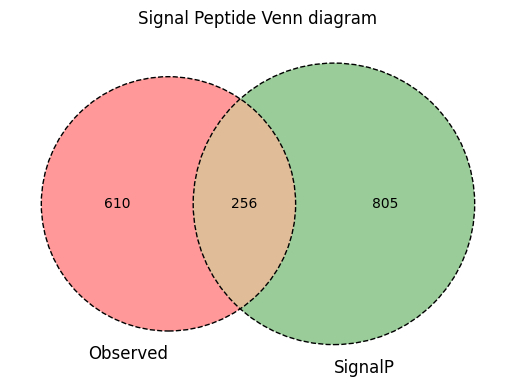

In [17]:
# Create the sets
df_acc = set(df['Accession'])
df1_acc = set(df1['Accession'])

# Create the Venn diagram
subsets = [df_acc, df1_acc]
v = venn2(subsets, set_labels=('Observed', 'SignalP'))
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Signal Peptide Venn diagram")
# Show the plot
plt.show()

### DeepLoc localizaiton predictions of singal peptides

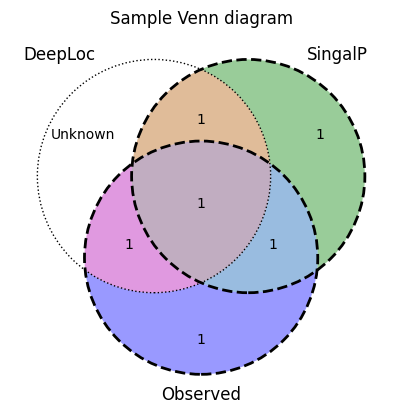

In [18]:
# Create the data sets 
#df_acc = set(df['Accession'].tolist())
#df1_acc = set(df1['Accession'].tolist())
#df2_acc = set(df2['Accession'].tolist())

# Create the Venn diagram
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('DeepLoc', 'SingalP', 'Observed'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")

plt.show()

d.	EXTRA: Cross-reference results with deeploc  and make some nice plots about how many it could predict correctly etc. 